<a href="https://colab.research.google.com/github/simon-clematide/colab-notebooks-for-teaching/blob/main/OpenAI_Embeddings_Visualization_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Link to this notebook

In [ ]:
!pip install openai
!pip install scikit-learn matplotlib

## Part 1: Visualize Text Embeddings

In [ ]:
sentence1 = "Hi, how are you?"
sentence2 = "Hello, how's it going?"

sentence3 = "I wonder what the weather will be like tomorrow?"

Expectation:
* `sentence1` and `sentence2` should be **close** in embedding space, since they are similar in meaning.
* `sentence3` should be **farther apart**.

In [ ]:
# Use the OpenAI API to get text embeddings

from openai import OpenAI

client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))  # TODO: Insert your API key

def get_embedding(text, model="text-embedding-3-large"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

sentence1_embedding = get_embedding(sentence1)
sentence2_embedding = get_embedding(sentence2)
sentence3_embedding = get_embedding(sentence3)

In [ ]:
# Verify that we got a vector of numbers for each sentence
sentence1_embedding[:10]

[0.002584584290161729,
 0.022756416350603104,
 -0.0320146270096302,
 -0.02903589978814125,
 0.01777845062315464,
 -0.009539983235299587,
 0.019978953525424004,
 -0.01768452674150467,
 -0.005105434451252222,
 0.02511793188750744]

Next, let's **visualize** the embeddings of the three sentences in 2D space. \

There is no need to understand the function below in depth – it applies Multidimensional Scaling (MDS) to the embeddings.\
Embeddings with a smaller cosine distance will appear closer to each other in the plot.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS


def visualize_embeddings(sentences, embeddings):
    assert len(sentences) == len(embeddings)
    embeddings = np.array(embeddings)

    # Step 1: Compute the cosine similarity matrix
    cosine_sim_matrix = cosine_similarity(embeddings)

    # Step 2: Convert cosine similarities to distances (1 - similarity)
    distance_matrix = 1 - cosine_sim_matrix

    # Step 3: Use MDS to project the points into 2D based on the distance matrix
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42, normalized_stress="auto")
    vis_dims = mds.fit_transform(distance_matrix)

    # Step 4: Visualize the 2D projection
    x = [x for x, y in vis_dims]
    y = [y for x, y in vis_dims]

    plt.scatter(x, y, c=list(range(len(embeddings))), alpha=0.6)

    # Label each point with the corresponding sentence
    for i, txt in enumerate(sentences):
        plt.annotate(txt, (x[i], y[i]), fontsize=12)

    # Step 5: Annotate the cosine distances between points
    for i in range(len(embeddings)):
        for j in range(i + 1, len(embeddings)):
            # Retrieve cosine distance between the embeddings (from the original distance matrix)
            dist = distance_matrix[i, j]

            # Find the midpoint between the points to place the label
            mid_x = (x[i] + x[j]) / 2
            mid_y = (y[i] + y[j]) / 2

            # Annotate the cosine distance on the plot at the midpoint
            plt.text(mid_x, mid_y, f"{dist:.2f}", fontsize=10, color="blue", ha="center")

            # Add an arrow from point i to point j
            plt.arrow(x[i], y[i], x[j] - x[i], y[j] - y[i], color="gray", alpha=0.1)

    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.show()

Now, let's visualize the embeddings of the three sentences.

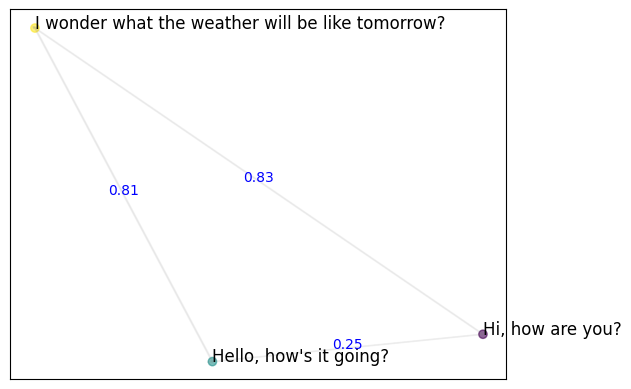

In [ ]:
visualize_embeddings(
    sentences=[sentence1, sentence2, sentence3],
    embeddings=[sentence1_embedding, sentence2_embedding, sentence3_embedding]
)

## Part 2: Use Text Embeddings for Spotting the Correct Translation

How do you say **"Hi, how are you?"** in Esperanto?

a) "Mi ne komprenas." \
b) "Kiom longe for estas la Ejfel-turo?" \
c) "Saluton, kiel vi fartas?"

Find the correct translation simply using text embeddings.

In [ ]:
# TODO